# Modulos

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap

# Data

In [ ]:
data= pd.read_csv("AnunciosRedesSociales.csv")

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
X= data.iloc[:,[2,3]].values
y= data.iloc[:,4].values 

# Train test

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size= .25, random_state=0)

# Escalado

In [ ]:
scx= StandardScaler()
x_train=scx.fit_transform(x_train)
x_test= scx.fit_transform(x_test) 

# SVM

In [ ]:
from sklearn.svm import SVC
clasificador = SVC(kernel= 'linear', random_state=0)
clasificador.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicción

In [ ]:
y_pred = clasificador.predict(x_test)

In [ ]:
y_pred-y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0])

## Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


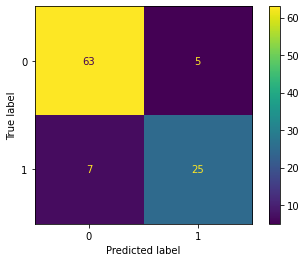

In [ ]:
plot_confusion_matrix(clasificador, x_test, y_test)  
plt.show()

## Visualización

### Train

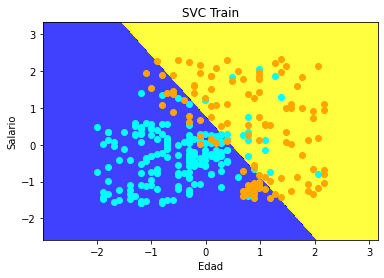

In [ ]:
X_set,y_set = x_train,y_train
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, 
                             step=0.01),np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,clasificador.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha= 0.75,cmap=ListedColormap(('blue','yellow')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c= ListedColormap(('cyan','orange'))(i),label= j)

plt.title("SVC Train")
plt.xlabel("Edad")
plt.ylabel("Salario")
plt.show()

### Test

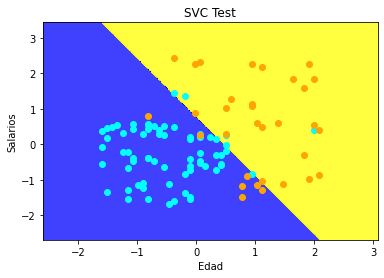

In [ ]:
X_set,y_set = x_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, 
                             step=0.01),np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,clasificador.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha= 0.75,cmap=ListedColormap(('blue','yellow')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c= ListedColormap(('cyan','orange'))(i),label= j)

plt.title("SVC Test")
plt.xlabel("Edad")
plt.ylabel("Salarios")
plt.show()